<div style='text-align: right; font-weight: bold;'> March 19, 2016 </div>

<div style='text-align: right;'>Nitin Narayan | n.narayan@student.tue.nl | student no.0976544 </div>

<div style='text-align: right;'>Rodrigo Mendoza | r.a.mendoza.marin@student.tue.nl  | student no.0980103</div>

<div style="text-align: right;">Both members of the group contributed equally</div>

<h1 align="center" style="color: #0066cc">2 Evaluation Homework</h1> 

In [35]:
# Global imports and settings
from sklearn.metrics import roc_curve, auc
import numpy as np
from scipy.spatial import ConvexHull

# Matplotlib
%matplotlib inline
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (8, 8)
plt.rcParams["figure.max_open_warning"] = -1

# Print options
import numpy as np
np.set_printoptions(precision=4)

# Slideshow
from notebook.services.config import ConfigManager
cm = ConfigManager()
cm.update('livereveal', {'width': 1440, 'height': 768, 'scroll': True, 'theme': 'simple'})

# Silence warnings
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.simplefilter(action="ignore", category=UserWarning)
warnings.simplefilter(action="ignore", category=RuntimeWarning)

<h2 style="color: #0066cc"> 2.1 Exercise 1: ROC curves </h2>


### 2.1.1 Plot A, B, and C on a ROC diagram. Use a number of different thresholds for C (at least 3).


Create the variables.

In [36]:
n_classes = 5
y_true = np.array([1,1,1,1,1,1,1,0,0,0,0,0,0])
scores_a = np.array([[1,1,0,0,1,1,0,0,1,0,0,0,0]])
scores_b = np.array([[1,1,1,1,0,1,1,0,1,0,1,0,0]])
scores_c1 = np.array([[0.8,0.9,0.7,0.6,0.4,0.8,0.4,0.4,0.6,0.4, 0.4, 0.4,0.2]])
scores_c2 = np.array([[0.8,0.9,0.7,0.6,0.4,0.8,0.4,0.4,0.6,0.4, 0.4, 0.4,0.2]])
scores_c3 = np.array([[0.8,0.9,0.7,0.6,0.4,0.8,0.4,0.4,0.6,0.4, 0.4, 0.4,0.2]])

We select the __thresholds: 0.5, 0.3 and 0.6__. Filter by thresholds and join them into one array.

In [37]:
scores_c1 = np.where(scores_c1>0.5,1,0)
scores_c2 = np.where(scores_c2>0.3,1,0)
scores_c3 = np.where(scores_c3>0.6,1,0)
scores  = np.concatenate((scores_a,scores_b,scores_c1, scores_c2, scores_c3), axis=0)

Compute ROC curve and ROC area for each prediction.

In [38]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes): # sklearn metrics
    fpr[i], tpr[i], _ = roc_curve(y_true, scores[i], pos_label=1)
    roc_auc[i] = auc(fpr[i], tpr[i])
# When the roc curve path is vertical at the the beginning 
# it doesn't return you the point (0,0)
# We add it manually for easy plotting
# FPR = 0 / 0 + 6 = 0. 
fpr[4] = np.append(0., fpr[4])
tpr[4] = np.append(0., tpr[4])

The plot gives different colors for each of the predictions. The dash black line is exactly in the middle (random classifier p = 0.5). The area under the curve is shown in the bottom right corner. Predicter C3 with a threshold of 0.6 has the highest ROC AUC value of $0.7857$. 

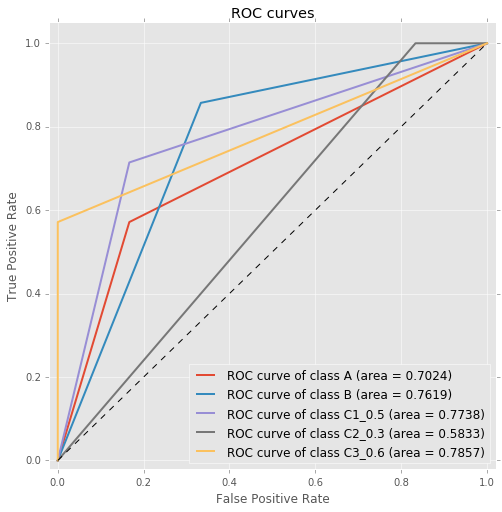

In [39]:
plt.style.use('ggplot')
names = ['A','B','C1_0.5', 'C2_0.3', 'C3_0.6']
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.4f})'
                                   ''.format(names[i], roc_auc[i]), linewidth=2.0)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves')
plt.legend(loc="lower right")
plot_margin = 0.02
x0, x1, y0, y1 = plt.axis()
plt.axis((x0 - plot_margin,
          x1 + plot_margin,
          y0 - plot_margin,
          y1 + 0))
plt.show()

### 2.1.2 Assume that the classes are balanced, hence P(+) = P(-􀀀) = 0.5. The cost of a false positive and false negative are CFP = 1 and CFN = 5. Which classifier is best: A, B, or C with a threshold of 0.5? Show geometrically in the ROC diagram which models are optimal under this cost function.

First, we incorporate the missclasification costs given by $ cost = pos*(1–TPR)*C_{FN} + neg*FPR*C_{FP}$, for each of the predictions:

$$
\begin{align}
Cost_{A} &= (0.5)*(1-0.5714)*(5)+(0.5)*(1-0.166)*(1)  \\
&= 1.4885 \\
Cost_{B} &= (0.5)*(1-0.8571)*(5)+(0.5)*(1-0.3333)*(1)  \\
&= 0.6906 \\
Cost_{C_{3}} &= (0.5)*(1-0.7143)*(5)+(0.5)*(1-0.1667)*(1)  \\
&= 1.1309
\end{align}
$$


__Note__: to obtain TPR or FPR we can use either the points from fpr[i], tpr[i] or construct the confusion matrix and then obtain TPR and FPR with the ecuations:
$$
\begin{align}
TPR &= \frac{TP}{TP + FN}  \\
FPR &= \frac{FP}{FP + TN}
\end{align}
$$

As an example, lets look at classifier A:


<table border="0" style="width : 30%; text-align: center;">
  <tr>
    <td style="border: 1px solid white; border: 1px solid white;"></td>
    <td colspan="3" style="text-align: center; border: 1px solid white;">Predicted</td>
  </tr>
  <tr>
    <td style="border: 1px solid white;"></td>
    <td></td>
    <td style="text-align: center;">-</td>
    <td style="text-align: center;">+</td>
  </tr>
  <tr>
    <td rowspan="2" style="text-align: center; border: 1px solid white;">Actual</td>
    <td style="text-align: center;">-</td>
    <td style="text-align: center;">5</td>		
    <td style="text-align: center;">1</td>
  </tr>
  <tr>
    <td style="text-align: center;">+</td>
    <td style="text-align: center;">3</td>		
    <td style="text-align: center;">4</td>
  </tr>
</table>

$$
\begin{align}
TN &= 5 \\
FP &= 1 \\
FN &= 3\\
TP &= 4 \\
TPR_{A} &= \frac{4}{4+3} \\
&= 0.5714 \\
FPR_{A} &= \frac{1}{1+6}  \\
&= 0.1660\\
\end{align}
$$

The classifier B has the lowest cost with $0.6906$, hence we choose B as the best one. To show geometrically which models are optimal under this cost function we need first to calculate the slope as follows:

$$
\begin{align}
slope &= \frac{neg*C_{FP}}{pos*C_{FN}} \\ 
&= \frac{0.5)(1)}{(0.5)(5)}  \\
&= 0.20
\end{align}
$$

Now we add on the classifier space the iso-cost line with a slope of 0.20 (black line). As we see it touches B who has actually the smallest cost among all.

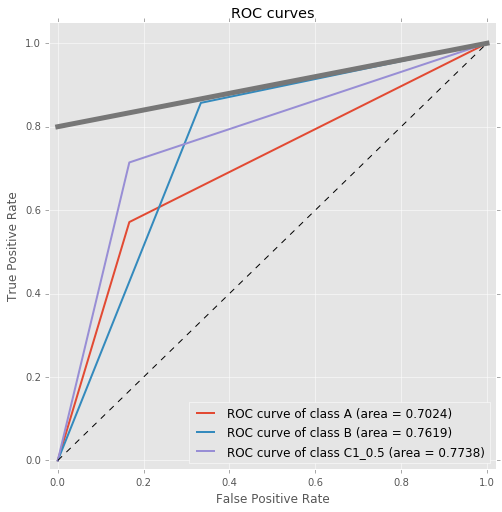

In [40]:
plt.style.use('ggplot')
names = ['A','B','C1_0.5', 'C2_0.3', 'C3_0.6']
for i in range(3):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.4f})'
                                   ''.format(names[i], roc_auc[i]), linewidth=2.0)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves')
plt.legend(loc="lower right")
plot_margin = 0.02
x0, x1, y0, y1 = plt.axis()
plt.axis((x0 - plot_margin,
          x1 + plot_margin,
          y0 - plot_margin,
          y1 + 0))
x = np.linspace(0, 1, 3)
y = 0.2 * (x) + 0.80 # line with 0.2 slope
plt.plot(x, y, linewidth=5.0)
plt.show()

### 2.1.3 Draw the convex hull of the classifiers A, B, C. Which classifiers are never optimal? Which classifiers are optimal in a certain environment?

Use scipy.spatial as the convex hull algorithm. Load all points from FPR and TPR

In [41]:
# #convexHull
points = np.vstack((fpr[0], tpr[0])).T
for i in range(n_classes): # the first 3 classifiers
    points = np.append(points, np.vstack((fpr[i], tpr[i])).T, axis=0)
hull = ConvexHull(points)

Plot the __convex hull __

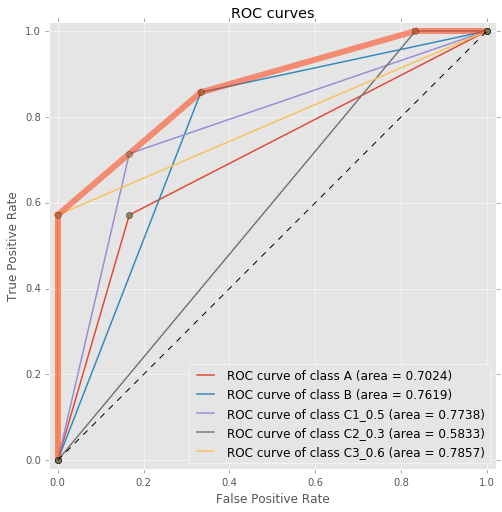

In [42]:
plt.style.use('ggplot')
#Add the 3 roc curves
names = ['A','B','C1_0.5','C2_0.3','C3_0.6']
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.4f})'
                                   ''.format(names[i], roc_auc[i]), linewidth=1.5)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves')
plt.legend(loc="lower right")

# Draw line path of convex hull, skipping the first path "diagonal"
iterpoint = iter(hull.simplices)
next(iterpoint)
for simplex in iterpoint:
    plt.plot(points[simplex, 0], points[simplex, 1], '#ff3300', lw=6, alpha=0.5)
    
# dots
plt.plot(points[:,0], points[:,1], 'o', color = '#7a7a52', alpha=0.5)
#middle line
plt.plot([0, 1], [0, 1], 'k--')
#margins
plot_margin = 0.02
x0, x1, y0, y1 = plt.axis()
plt.axis((x0 - plot_margin,
          x1 + plot_margin,
          y0 - plot_margin,
          y1 + plot_margin))
plt.show()

The classifier that is never optimal is A, it nevers touches the convex path. The optimal is a conditional on the number of FPR and TPR we have. Observe as FPR and TPR increase we encounter different classifiers over the convex path. For example, when we have FPR > 0.2 and TPR >0.8 we see classifier B and C2 are in the area, although B AUC is higher which suggest to select B over C2. In conclusion, choose depending on the number of FPR and TPR.

<h2 style="color: #0066cc"> 2.2 Exercise 2: Model selection </div>

### Generate a 2-dimensional dataset with 1000 examples.

In [43]:
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=1000,centers=50, n_features=2, random_state=0)

__Note__: we used 50 centers to make more realistic the problem instead of just two gaussian distributions like in mlbench.threenorm in R.

Below you can see a scatter plot of all the points

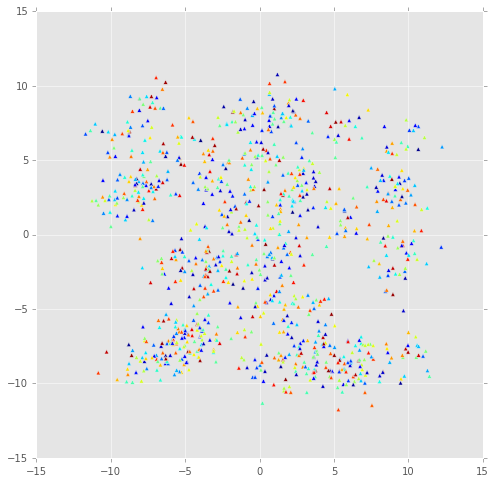

In [44]:
colors = np.random.rand(len(X))
plt.scatter(X[:, 0], X[:, 1], marker='^', c=colors)
plt.show()

 ### 2.2.1 Use 10-fold crossvalidation and plot k against the misclassification rate. Which value of k should you pick?

In [45]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import zero_one_loss
from sklearn import cross_validation
n_samples = len(X)
kf = cross_validation.KFold(n_samples, n_folds=10, shuffle=False, random_state=None)
error_total = np.zeros([49, 1], dtype=float)
for k in range(1,50):
    error = []
    clf = KNeighborsClassifier(n_neighbors=k)
    for train_index, test_index in kf:
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        clf.fit(X_train, y_train)
        error.append( zero_one_loss(y_test, clf.predict(X_test)) )
    error_total[k-1, 0] = np.array(error).mean()


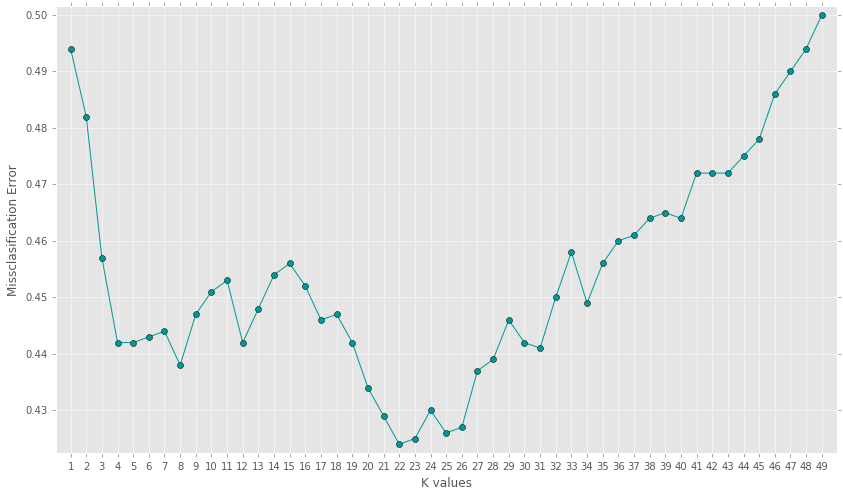

In [46]:
plt.rcParams["figure.figsize"] = (14, 8)
x = np.arange(1,50, dtype=int)
plt.style.use('ggplot')
plt.plot(x, error_total[:, 0], '#009999', marker='o')
plt.xticks(x, x)
plt.margins(0.02)
plt.xlabel('K values')
plt.ylabel('Missclasification Error')
plt.show()

As we see in the graph, the missclassification is low when we set k = 22. 

### 2.2.2 Do the same but with 100 bootstrapping repeats. What does the bias-variance trade-o look like for low and high values of k?

We randomly draw with ShuffleSplit and use the same cross validation iterator to do the 100 bootstrapping repeats.

In [47]:
n_samples = len(X)
kf = cross_validation.ShuffleSplit(n_samples, n_iter=100, test_size=0.1, train_size=0.9, random_state=None)
error_total = np.zeros([49, 1], dtype=float)
for k in range(1,50):
    error = []
    clf = KNeighborsClassifier(n_neighbors=k)
    for train_index, test_index in kf:
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        clf.fit(X_train, y_train)
        error.append( zero_one_loss(y_test, clf.predict(X_test)) )
    error_total[k-1, 0] = np.array(error).mean()

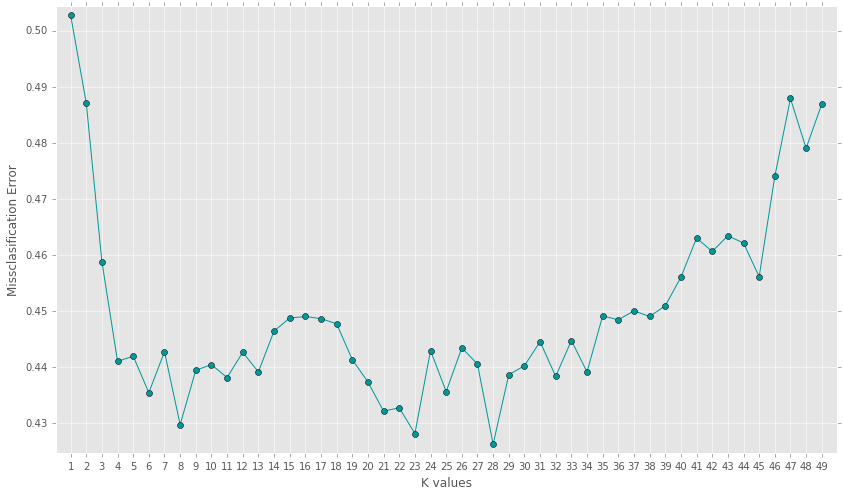

In [48]:
plt.rcParams["figure.figsize"] = (14, 8)
x = np.arange(1,50, dtype=int)
plt.style.use('ggplot')
plt.plot(x, error_total[:, 0], '#009999', marker='o')
plt.xticks(x, x)
plt.margins(0.02)
plt.xlabel('K values')
plt.ylabel('Missclasification Error')
plt.show()

### 2.2.3 What if you generate a dataset with 10000 examples, is the result still the same?

### 2.2.4 Repeat step 1-3, this time optimizing the hyperparameters of a decision tree. Choose the hyperparameter(s) that you think have the largest impact and use sensible value ranges.

Here, we build a decision tree classifier and select the maximum depth as the first hyper parameter. We used GridSearchCV to optimize the maximum depth hyperparameter using a range of [1,10]. We plot the accuracy vs the maximum depth.

Best score:
0.95
Best parameter:
{'max_depth': 1}


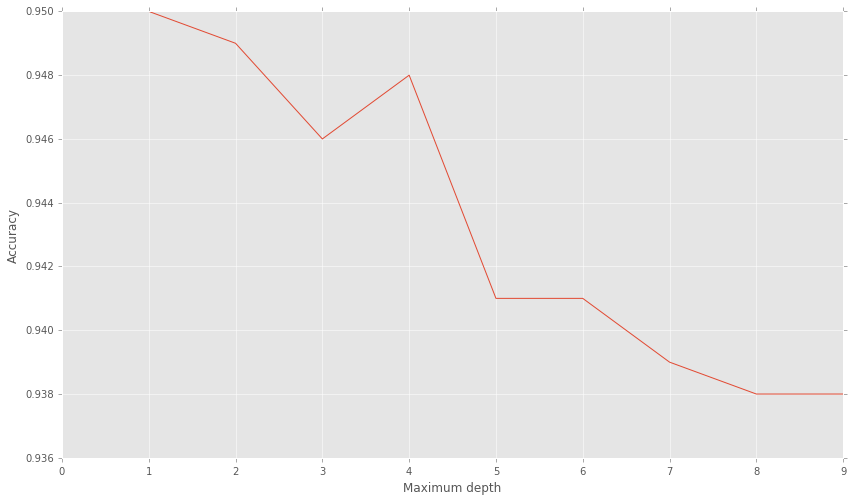

In [56]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.grid_search import GridSearchCV
# Create dataset
X, y = make_blobs(n_samples=1000,centers=2, n_features=2, random_state=0)
# First hyper-parameter: max. depth 
depth = range(1,11)
# parameter distribution
param_dist1 = dict(max_depth=depth)
# Decision tree classifier
clf1 = DecisionTreeClassifier()
# Grid seaarch
grid = GridSearchCV(clf1, param_dist1, cv=10, scoring='accuracy')
grid.fit(X, y)
# print scores of grid search
grid.grid_scores_
grid_mean_scores =[result.mean_validation_score for result in grid.grid_scores_]
# print best scores, parameters
print "Best score:"
print grid.best_score_
print "Best parameter:"
print grid.best_params_
# plot the scores
plt.style.use('ggplot')
plt.plot(grid_mean_scores)
plt.xlabel('Maximum depth')
plt.ylabel('Accuracy')
plt.show()


The second parameter we optimize is the minimum leaf samples. The range we use here is [1,10]. The plot of accuracy vs minimum leaf samples is plotted to observe the variation of accuracy with the number of minimum leaves chosen,

Best score:
0.952
Best parameter:
{'min_samples_leaf': 9}


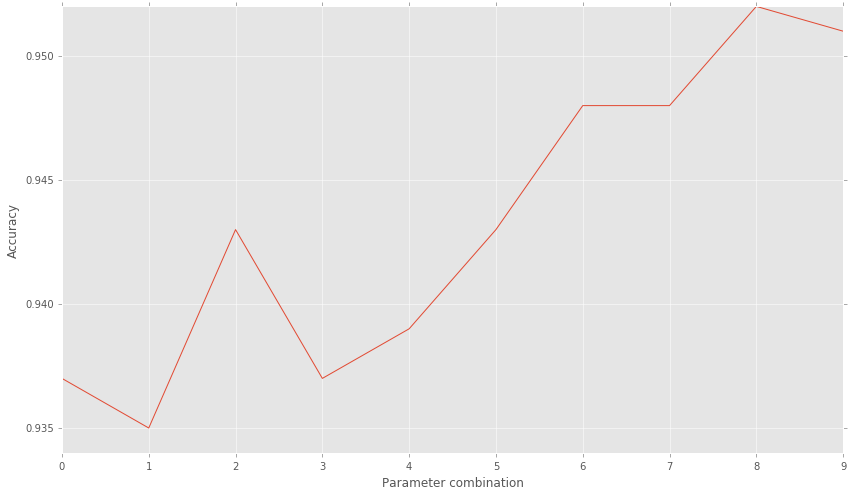

In [50]:
# Second hyper-parameter: min. samples 
minsamples = range(1,11)
# parameter distribution
param_dist2 = dict(min_samples_leaf=minsamples)
# Decision tree classifier
clf2 = DecisionTreeClassifier()
# Grid seaarch
grid = GridSearchCV(clf2, param_dist2, cv=10, scoring='accuracy')
grid.fit(X, y)
# print scores of grid search
grid.grid_scores_
grid_mean_scores =[result.mean_validation_score for result in grid.grid_scores_]
# print best scores, parameters
print "Best score:"
print grid.best_score_
print "Best parameter:"
print grid.best_params_
# plot the scores
plt.style.use('ggplot')
plt.plot(grid_mean_scores)
plt.xlabel('Minimum leaf samples')
plt.ylabel('Accuracy')
plt.show()

Next we select a pair of hyperparameters to optimize. These hyperparameters are the maximum depth and minimum leaf samples (a combination of the parameters chosen before).

Best score:
0.954
Best parameter:
{'max_depth': 4, 'min_samples_leaf': 9}


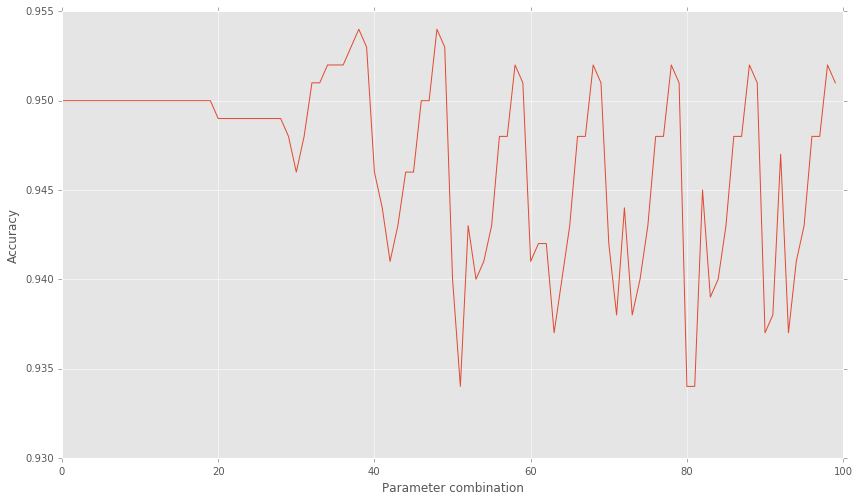

In [51]:
# parameter distribution
param_dist3 = dict(max_depth=depth, min_samples_leaf=minsamples)
# Decision tree classifier
clf3 = DecisionTreeClassifier()
# Grid search
grid = GridSearchCV(clf3, param_dist3, cv=10, scoring='accuracy')
grid.fit(X, y)
# print scores of grid search
grid.grid_scores_
grid_mean_scores =[result.mean_validation_score for result in grid.grid_scores_]
# print best scores, parameters
print "Best score:"
print grid.best_score_
print "Best parameter:"
print grid.best_params_
# plot the scores
plt.style.use('ggplot')
plt.plot(grid_mean_scores)
plt.xlabel('Parameter combination')
plt.ylabel('Accuracy')
plt.show()

<h2 style="color: #0066cc"> 2.3 Exercise 3: Optimization </h2>

### Import the PenDigits dataset from OpenML (http://www.openml.org/d/32) into R or Python, and then create a separate test set with 20% of the instances using random stratied sampling. Then do the following:

### Optimize the main hyperparameters (at least 2) of a decision tree learner (or SVMs) with a random search. Use nested resampling on the training set to obtain a clean evaluation. Evaluate your optimized hyperparameter settings on the separate test set.

### Do the same, but this time don't use nested resampling: just optimize the hyperparameter settings on the training data. Do you get diferent optimized parameters? Also evaluate these on your separate test set. Which approach yields the best results? Explain your findings.

#### Optimize these hyperparameters again (using nested resampling), but replace random search with a more intelligent approach, e.g. iterated F-racing. Plot the number of evaluations against the perfor- mance of the best hyperparameters up till then, for both approaches. Which approach finds good hyperparameter settings faster? 
